In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from pathlib import Path

data_path = Path.cwd().parent / "content" / "drive" / "Shared drives" / "SigmaLaw" / "classifier" / "data"

In [ ]:
from random import randint
import numpy as np
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras import Sequential
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Maximum, LayerNormalization, Bidirectional, GRU
from keras.utils import *
from keras.initializers import *
import tensorflow as tf
import time, random

In [ ]:
m=900
m1=810
batch_size = 1000
latent_dim =512
num_samples = 10


In [ ]:
import numpy as np
X = np.load(data_path/ "numpy_files"/ 'data_1000.npy')
Y = np.load(data_path/ "numpy_files"/ 'label_1000.npy')
print(Y.shape)


(1000, 443, 2)


In [ ]:
t=443
X_train = X[0:m,:,:]
X_test = X[m:batch_size,:,:]

y = Y.reshape(batch_size,t, 2)
y_train = y[0:m,:,:]
y_test = y[m:batch_size,:,:]



In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)



(900, 443, 301)
(900, 443, 2)
(100, 443, 301)
(100, 443, 2)


In [ ]:
num_encoder_tokens=301
num_decoder_tokens=2




In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(latent_dim, input_shape=(t, num_encoder_tokens), return_sequences=True)))
model.add(Dense(num_decoder_tokens, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
    metrics=[tf.keras.metrics.RecallAtPrecision(precision=0.7)])

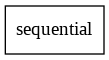

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs=100, validation_split=0.1)

NameError: ignored

In [ ]:
model.save(data_path/ "LSTM_512_1000samples")

In [ ]:
 results=[]
 for i in range(0,batch_size):
   x1=X[i,:,:].reshape(1, t, num_encoder_tokens)
   dec = model.predict(x1)
   results.append(dec)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
threshold=0.5
Ap=[]
Pp=[]
Rp=[]
F1p=[]
Ad=[]
Pd=[]
Rd=[]
F1d=[]
import tensorflow as tf
Accuracy=[]
for i in range(0,batch_size):
    dec=results[i]
    dec2 = np.where(dec > threshold, 1, 0)
    yp=y[i,:,0].reshape(t)
    predp=dec2[:,:,0].reshape(t)
    yd=y[i,:,1].reshape(t)
    predd=dec2[:,:,1].reshape(t)
# accuracy: (tp + tn) / (p + n)
    accuracyp = accuracy_score(yp, predp)
    Ap.append(accuracyp)
    accuracyd = accuracy_score(yd, predd)
    Ad.append(accuracyd)
# precision tp / (tp + fp)
    precisionp = precision_score(yp, predp)
    Pp.append(precisionp)
    precisiond = precision_score(yd, predd)
    Pd.append(precisiond)
# recall: tp / (tp + fn)
    recallp = recall_score(yp, predp)
    Rp.append(recallp)
    recalld = recall_score(yd, predd)
    Rd.append(recalld)

# f1: 2 tp / (2 tp + fp + fn)
    f1p = f1_score(yp, predp)
    F1p.append(f1p)
    f1d = f1_score(yd, predd)
    F1d.append(f1d)





In [ ]:
print("petitioner")
print("\nTraining set results: ")
print("accuracy :",sum(Ap[0:m1])/len(Ap[0:m1]))
print("precision :",sum(Pp[0:m1])/len(Pp[0:m1]))
print("recall :",sum(Rp[0:m1])/len(Rp[0:m1]))
print("f1 :",sum(F1p[0:m1])/len(F1p[0:m1]))
print("\nTest set results: ")
print("accuracy :",sum(Ap[m:batch_size])/len(Ap[m:batch_size]))
print("precision :",sum(Pp[m:batch_size])/len(Pp[m:batch_size]))
print("recall :",sum(Rp[m:batch_size])/len(Rp[m:batch_size]))
print("f1 :",sum(F1p[m:batch_size])/len(F1p[m:batch_size]))

print("\ndefendant")
print("\nTraining set results: ")
print("accuracy :",sum(Ad[0:m1])/len(Ad[0:m1]))
print("precision :",sum(Pd[0:m1])/len(Pd[0:m1]))
print("recall :",sum(Rd[0:m1])/len(Rd[0:m1]))
print("f1 :",sum(F1d[0:m1])/len(F1d[0:m1]))
print("\nTest set results: ")
print("accuracy :",sum(Ad[m:batch_size])/len(Ad[m:batch_size]))
print("precision :",sum(Pd[m:batch_size])/len(Pd[m:batch_size]))
print("recall :",sum(Rd[m:batch_size])/len(Rd[m:batch_size]))
print("f1 :",sum(F1d[m:batch_size])/len(F1d[m:batch_size]))





